Please use Python3 <= 3.8

In [5]:
# Install packages
%pip install Pillow
%pip install torch

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [52]:
# Import packages
import os
import re
from IPython.display import display
from PIL import Image
import json
from zipfile import ZipFile
import shutil

### Utils

In [30]:
# Constants
GW_GT_PATH = os.path.join("..", "data", "processed", "GW", "ground_truth", "GW_gt.json")
GW_IMAGE_PATH = os.path.join("..", "data", "processed", "GW", "line_image", "GW_image.json")
IAM_GT_PATH = os.path.join("..", "data", "processed", "IAM", "ground_truth", "IAM_gt.json")
IAM_IMAGE_PATH = os.path.join("..", "data", "processed", "IAM", "line_image", "IAM_image.json")
bullinger_GT_PATH = os.path.join("..", "data", "processed", "Bullinger", "ground_truth", "bullinger_gt.json")
bullinger_IMAGE_PATH = os.path.join("..", "data", "processed", "Bullinger", "line_image", "bullinger_image.json")

In [54]:
def visualise_dataset(gt_path, image_path, data_name=None):
    if data_name:
        root_path = os.path.join("..", "data", "raw", "Bullinger")
        extract_folder = os.path.join(root_path, "extracted_folder")
        # Open the ZIP file
        if not os.path.exists(extract_folder):
            with ZipFile(os.path.join(root_path, "train", "0-2000-out.zip"), "r") as zip_file:
                zip_file.extractall(extract_folder)
            # for zip_filename in os.listdir(os.path.join(root_path, "train")):
            #     if zip_filename.endswith(".zip"):
            #         with ZipFile(os.path.join(root_path, mode, zip_filename), "r") as zip_file:
            #             zip_file.extractall(extract_folder)
        # gt_path = os.path.join(extract_folder, "0-2000-out", "de", "1000_00_r1l7.txt")
        image_path = os.path.join(extract_folder, "0-2000-out", "de", "1000_00_r1l7.png")
    else:
        # Open the data files and read them
        with open(image_path, "r") as file:
            image_dict = json.load(file)

        # Get the first data sample
        # file_name, gt = next(iter(gt_dict.items()))
        image_path = image_dict[file_name]
        image_path = image_path.replace(".", "..", 1)

    with open(gt_path, "r") as file:
        gt_dict = json.load(file)
    file_name, gt = next(iter(gt_dict.items()))

    print("Image:")
    image = Image.open(image_path)
    display(image)

    print("Ground Truth:")
    print(gt)
    if data_name:
        shutil.rmtree(os.path.join("..", "data", "raw", "Bullinger", "extracted_folder"))
    return

In [9]:
def get_punctuations() -> set:
    """
    get_punctuations()

    Outputs all the punctuations/dates used in the GW dataset.

    Returns
    --------
    result: set
        A set that contains all unique punctuations in the ground truth file
    """
    # Open the GW ground truth file and read it
    path = os.path.join("..", "data", "raw", "GW", "ground_truth", "transcription.txt")
    with open(path, "r") as file:
        file_content = file.read()

    # Match the pattern with "s_" followed by two or more alphabets or decimal digits
    pattern = re.compile(r's_[a-zA-Z0-9]{2,}')
    # Find all matches in the file content and store it in result
    result = set()
    matches = pattern.findall(file_content)
    for match in matches:
        result.add(match[2:])
        
    return ", ".join(list(result))

In [27]:
def get_dataset_info(gt_path, image_path):
    with open(gt_path, "r") as file:
        gt_dict = json.load(file)
    with open(image_path, "r") as file:
        image_dict = json.load(file)
    all_gt = " ".join(list(gt_dict.values()))
    all_words = all_gt.split()
    info = {"text lines": len(gt_dict),
            "unique word instances": len(all_words),
            "unique letters": len(set(all_gt))}
    for k,v in info.items():
        print(f'{v} {k}')
    return

### GW Dataset

In [28]:
get_dataset_info(GW_GT_PATH, GW_IMAGE_PATH)

656 text lines
4850 unique word instances
68 unique letters


Image:


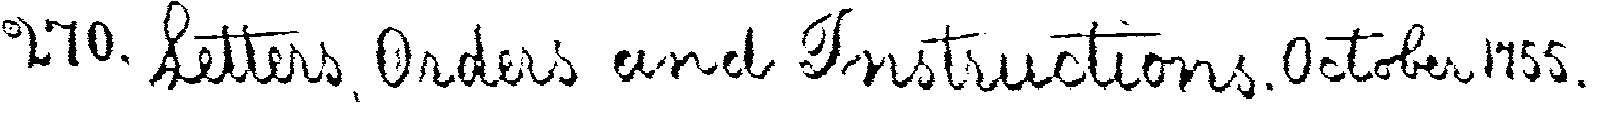

Ground Truth:
270. Letters, Orders and Instructions. October 1755.


In [53]:
visualise_dataset(GW_GT_PATH, GW_IMAGE_PATH)

In [54]:
get_punctuations()

'qo, 9th, 6th, 3rd, br, 2nd, qt, mi, pt, 7th, GW, lb, sl, sq, 1st, 0th, bl, cm, et, 8th, 5th, 1th'

### IAM Dataset

In [29]:
get_dataset_info(IAM_GT_PATH, IAM_IMAGE_PATH)

13353 text lines
100640 unique word instances
79 unique letters


Image:


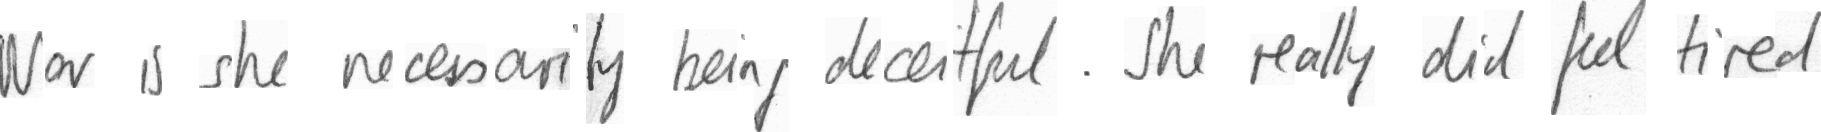

Ground Truth:
Nor is she necessarily being deceitful. She really did feel tired


In [55]:
visualise_dataset(IAM_GT_PATH, IAM_IMAGE_PATH)

### Bullinger Dataset

In [31]:
get_dataset_info(bullinger_GT_PATH, bullinger_IMAGE_PATH)

25322 text lines
198438 unique word instances
99 unique letters


Image:


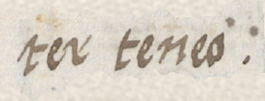

Ground Truth:
teneo.


In [55]:
visualise_dataset(bullinger_GT_PATH, bullinger_IMAGE_PATH, "Bullinger")